In [1]:
# Import Modules

import numpy as np 
import pandas as pd
import seaborn as sns

sns.set()
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt, matplotlib.image as mpimg

#Sklearn 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import patches
from sklearn.model_selection import train_test_split
from scipy import stats 
import math
import datetime
from sklearn.model_selection import train_test_split, cross_val_score,\
    GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
%matplotlib inline


# Students :  

-  Alexander Svetikov 320569791
-  Yevgeni Sparber 309125326

In [2]:
dfTrain = pd.read_csv(r'c:/Users/yev/desktop/statlearn/lab4/train.csv')
dfTest = pd.read_csv(r'c:/Users/yev/desktop/statlearn/lab4/test.csv')
del dfTrain['Unnamed: 0']
del dfTest['Unnamed: 0']
dfTrain = dfTrain[(dfTrain.y  == 7) | (dfTrain.y  == 1)]
dfTrain_X  = dfTrain.loc[:, dfTrain.columns != 'y']
dfTrain_y = dfTrain.loc[:, dfTrain.columns == 'y']
dfTest = dfTest[(dfTest.y  == 7) | (dfTest.y  == 1)]
dfTest_X  = dfTest.loc[:, dfTest.columns != 'y']
dfTest_y = dfTest.loc[:, dfTest.columns == 'y']

In [3]:
def PlotSomeDigits(NumDigitsToPlot,train_x,train_y,indexes,Random = False):
    """
    Function input : 
    NumDigitsToPlot - How many digits you want to plot
    train_x= Our Training features Set
    train_y= Out training labels Set
    The Function generates a plot of a random digits from the dataset. The amount of digits to plot chosen by the user
    """
    plt.figure(figsize=(20,20))
    if Random == True:
        DigitSamples = np.random.randint(1,len(train_x),NumDigitsToPlot)
        for digit in range(0,NumDigitsToPlot):
            plt.subplot(10,10,digit +1)
            grid = train_x.iloc[DigitSamples[digit]].to_numpy().reshape(28,28)
            plt.imshow(grid, cmap = "gray")
            plt.title(train_y.iloc[DigitSamples[digit],0])     
        plt.tight_layout()
    else:
        if NumDigitsToPlot > len(indexes):
            return print('The Vector of Misclassified Digits is not that big Dude')
        else:
            for digit in range(0,NumDigitsToPlot):
                plt.subplot(10,10,digit +1)
                grid = train_x.loc[indexes[digit]].to_numpy().reshape(28,28)
                plt.imshow(grid, cmap = "gray")
                plt.title(train_y.loc[indexes[digit]][0])     
            plt.tight_layout()                 

Plot some digits from our data set to get intuition

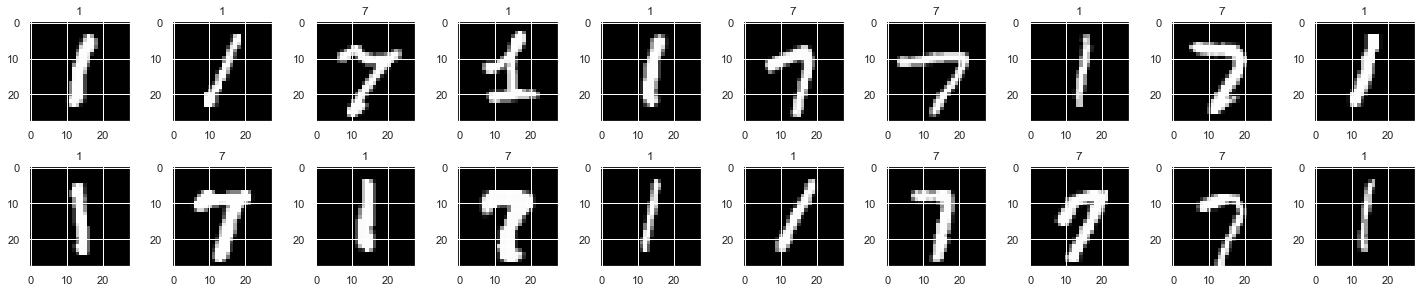

In [4]:
PlotSomeDigits(20,dfTrain_X,dfTrain_y,indexes=0,Random = True)  

Q.1

We did a comparison of several classifiers in terms of accuracy and got the highest accuracy achieved by the Random forest. because this is a non-parametric classifier we also wanted to compare it to a parametric classifier so our other classifier was logistic regression.

Since the running time was not high, we did not see the need to use dimensionally reduction algorithms such as PCA.
Aside from the fact that the Random forest got the highest accuracy results, it is considered an algorithm that works well in high dimensions.

In terms of choosing the threshold in both situations, we did not have a methodological reason to prefer any type of error over the other.

We started the exploration for the optimal threshold with 0.5 threshold value, with this value we noticed that the number of times the logistic regression is wrong in predicting digit 7 is 5 times greater than the error in predicting digit 1.

After some parameter tuning we found that the value 0.8 of the threshold is optimal in terms of the minimization the amount of the mistakes.

we used the same approach with Random forest and we found that the optimal threshold is 0.45.

The accuracy across each class in each classifier, the geometric mean and the total accuracy can be seen in the outputs.

In Random Forest, we used results from the attached article to decide how many trees to use. the recommendation in the article was to use between 64-128 trees to get the best balance between ROC and processing time.

we tested values above 128 trees but didn't get better accuracy.
For this problem we used 100 trees.

For the other hyperparameter in the Random forest we used grid search to find the best combination. here is the main hyperparameters:
max_depth - it indicates how deep the decision tree can be. The deeper the tree, the more splits it has & it captures more information about the data. However, with large depth values, we might get overfitting. Our grid search algorithm found the best value - 12.

min_samples_split - Specifies the minimum number of samples required to split an internal node.
best value by grid search - 4. 

min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. 
best value by grid search -2.

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

In [5]:
def getBestClassifier(algorithms,x_train,y_train,x_test,y_test):
    accuracy_set = {}
    for algo in algorithms:
        name = algo.__class__.__name__
        algo.fit(x_train, y_train)
        train_predictions = algo.predict(x_train)
        # Assess the models
        acc = accuracy_score(y_true=y_test,y_pred=algo.predict(x_test))
        if algo in algorithms:
            accuracy_set[algo] = acc
    best_algo = max(accuracy_set.keys(), key=(lambda k: accuracy_set[k]))
    print('best score',accuracy_set[best_algo],'acheived by',str(best_algo).split('(')[0])
    return best_algo,accuracy_set    

Looking for best classifier by accuracy , the winner : Random forest

In [6]:
# Bunch of Algos , Linear and Non-Linear for benchmarking
algorithms = [
    DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),
    GaussianNB(),LogisticRegression()]

best_Algo,accuracy_list = getBestClassifier(algorithms,dfTrain_X,dfTrain_y,dfTest_X,dfTest_y)

best score 0.9967637540453075 acheived by RandomForestClassifier


Logistic Regression:

In [7]:
logreg = LogisticRegression()
logreg.fit(dfTrain_X,dfTrain_y)
predict_probabilitiesTr = logreg.predict_proba(dfTrain_X)
predict_mineTr = np.where(predict_probabilitiesTr[:,1]  > 0.8, 7, 1)
predict_probabilities = logreg.predict_proba(dfTest_X)
predict_mine = np.where(predict_probabilities[:,1]  > 0.8, 7, 1)


Parameter grid search - seeking for the best Random forest parameters

In [8]:
from sklearn.model_selection import ParameterGrid

grid = { 'max_depth': [3,6,8,10,12,23], 'min_samples_split': [0.1,0.5,2,4,10],'min_samples_leaf': [2, 10, 30]}
test_scores = []

for g in ParameterGrid(grid):
    best_Algo.set_params(**g) 
    best_Algo.fit(dfTrain_X, dfTrain_y)
    test_scores.append(best_Algo.score(dfTest_X, dfTest_y))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.9976883957466481 {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 23}


Random Forest:

In [9]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth = 23, min_samples_split = 10,min_samples_leaf=2)
random_forest.fit(dfTrain_X, dfTrain_y)
y_predRNtrain = random_forest.predict_proba(dfTrain_X)
y_predtrain = np.where(y_predRNtrain[:,1] > 0.45, 7, 1)
y_predRN = random_forest.predict_proba(dfTest_X)
y_pred = np.where(y_predRN[:,1] > 0.45, 7, 1)


Q.2

In [10]:
def confMat(y_pred,y):
    count11 = 0 
    count17 = 0 
    count71 = 0 
    count77 = 0 
    y_pred = pd.DataFrame(data=y_pred.flatten())
    y=y.reset_index()
    del y['index']
    dftest = pd.merge(y_pred,y, left_index=True, right_index=True)
    dftest.columns = ['y_pred','y']
    for index , row in dftest.iterrows():
        if row['y'] == 1 | row['y_pred'] == 1:
            count11 = count11 + 1
        elif row['y'] == 1 | row['y_pred'] == 7:
            count17 = count17 + 1
        elif row['y'] == 7 | row['y_pred'] == 7:
            count77 = count77 + 1
        else :
            count71 = count71 + 1
    confmatrix = np.array([count11,count71,count77,count17]).reshape((2,2))
    return (confmatrix)

Accuracy of 1 over the train set of Logistic regression surprised us. after some investigation, we concluded that it might make sense. since we didn't do any dimensionality reduction and Logistic regression is linear model over linear data, it is possible to get perfect accuracy over the training set, however, for nonlinear scenarios it may be very rare.
It doesn't seem we have overfitting since the accuracy over the test set is also very high.

Total accuracy: 1.00000
Class1 accuracy: 1.00000
Class2 accuracy: 1.00000
Geometric mean accuracy: 1.00000


Text(48.5, 0.5, 'Actual')

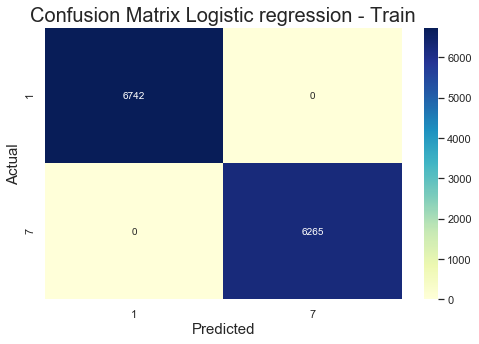

In [11]:

total_accuracy = (confMat(predict_mineTr,dfTrain_y)[0, 0] + confMat(predict_mineTr,dfTrain_y)[1, 1]) / float(np.sum(confMat(predict_mineTr,dfTrain_y)))
class1_accuracy = (confMat(predict_mineTr,dfTrain_y)[0, 0] / float(np.sum(confMat(predict_mineTr,dfTrain_y)[0, :])))
class2_accuracy = (confMat(predict_mineTr,dfTrain_y)[1, 1] / float(np.sum(confMat(predict_mineTr,dfTrain_y)[1, :])))
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy) 
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))
plt.figure(figsize = (8,5))
sns.heatmap(confMat(predict_mineTr,dfTrain_y)
, annot=True, fmt="d", cmap="YlGnBu",yticklabels=[1,7],xticklabels=[1,7])
plt.title('Confusion Matrix Logistic regression - Train', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)

Total accuracy: 0.99908
Class1 accuracy: 0.99896
Class2 accuracy: 0.99920
Geometric mean accuracy: 0.99908


Text(48.5, 0.5, 'Actual')

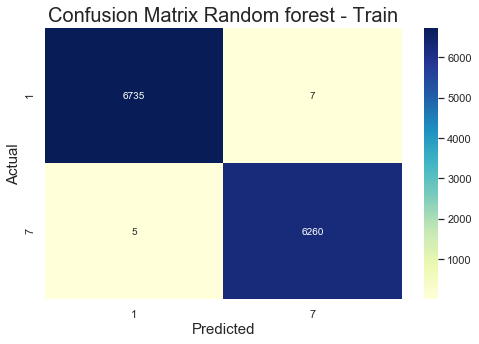

In [12]:
total_accuracy = (confMat(y_predtrain,dfTrain_y)[0, 0] + confMat(y_predtrain,dfTrain_y)[1, 1]) / float(np.sum(confMat(y_predtrain,dfTrain_y)))
class1_accuracy = (confMat(y_predtrain,dfTrain_y)[0, 0] / float(np.sum(confMat(y_predtrain,dfTrain_y)[0, :])))
class2_accuracy = (confMat(y_predtrain,dfTrain_y)[1, 1] / float(np.sum(confMat(y_predtrain,dfTrain_y)[1, :])))
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy) 
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))
plt.figure(figsize = (8,5))
sns.heatmap(confMat(y_predtrain,dfTrain_y)
, annot=True, fmt="d", cmap="YlGnBu",yticklabels=[1,7],xticklabels=[1,7])
plt.title('Confusion Matrix Random forest - Train', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)

Total accuracy: 0.99399
Class1 accuracy: 0.99824
Class7 accuracy: 0.98930
Geometric mean accuracy: 0.99376


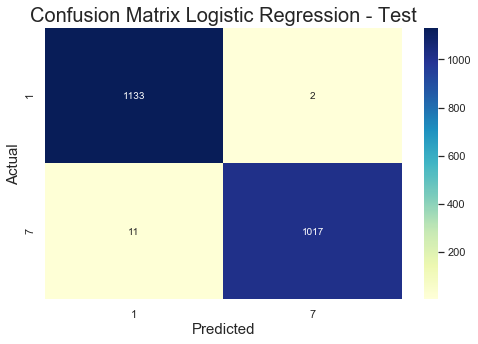

In [13]:
total_accuracy = (confMat(predict_mine,dfTest_y)[0, 0] + confMat(predict_mine,dfTest_y)[1, 1]) / float(np.sum(confMat(predict_mine,dfTest_y)
))
class1_accuracy = (confMat(predict_mine,dfTest_y)[0, 0] / float(np.sum(confMat(predict_mine,dfTest_y)[0, :])))
class2_accuracy = (confMat(predict_mine,dfTest_y)[1, 1] / float(np.sum(confMat(predict_mine,dfTest_y)[1, :])))
plt.figure(figsize = (8,5))
sns.heatmap(confMat(predict_mine,dfTest_y), annot=True, fmt="d", cmap="YlGnBu",yticklabels=[1,7],xticklabels=[1,7])
plt.title('Confusion Matrix Logistic Regression - Test', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class7 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

Total accuracy: 0.99723
Class1 accuracy: 0.99824
Class2 accuracy: 0.99611
Geometric mean accuracy: 0.99717


Text(48.5, 0.5, 'Actual')

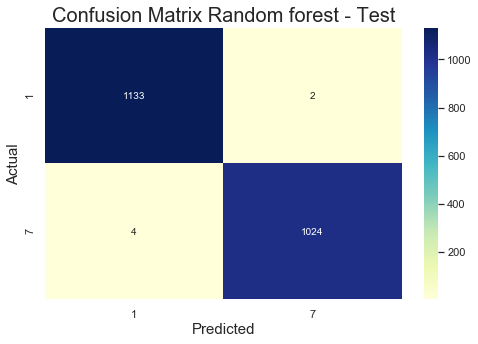

In [14]:
total_accuracy = (confMat(y_pred,dfTest_y)[0, 0] + confMat(y_pred,dfTest_y)[1, 1]) / float(np.sum(confMat(y_pred,dfTest_y)))
class1_accuracy = (confMat(y_pred,dfTest_y)[0, 0] / float(np.sum(confMat(y_pred,dfTest_y)[0, :])))
class2_accuracy = (confMat(y_pred,dfTest_y)[1, 1] / float(np.sum(confMat(y_pred,dfTest_y)[1, :])))
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy) 
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))
plt.figure(figsize = (8,5))
sns.heatmap(confMat(y_pred,dfTest_y)
, annot=True, fmt="d", cmap="YlGnBu",yticklabels=[1,7],xticklabels=[1,7])
plt.title('Confusion Matrix Random forest - Test', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)

Q.3
ROC curve for Random forest and Logistic regression both curves are almost similar, there is a tiny difference in the left top corner, which is hard to see from the plot.

Text(0.5, 1.0, 'Receiver operating characteristic')

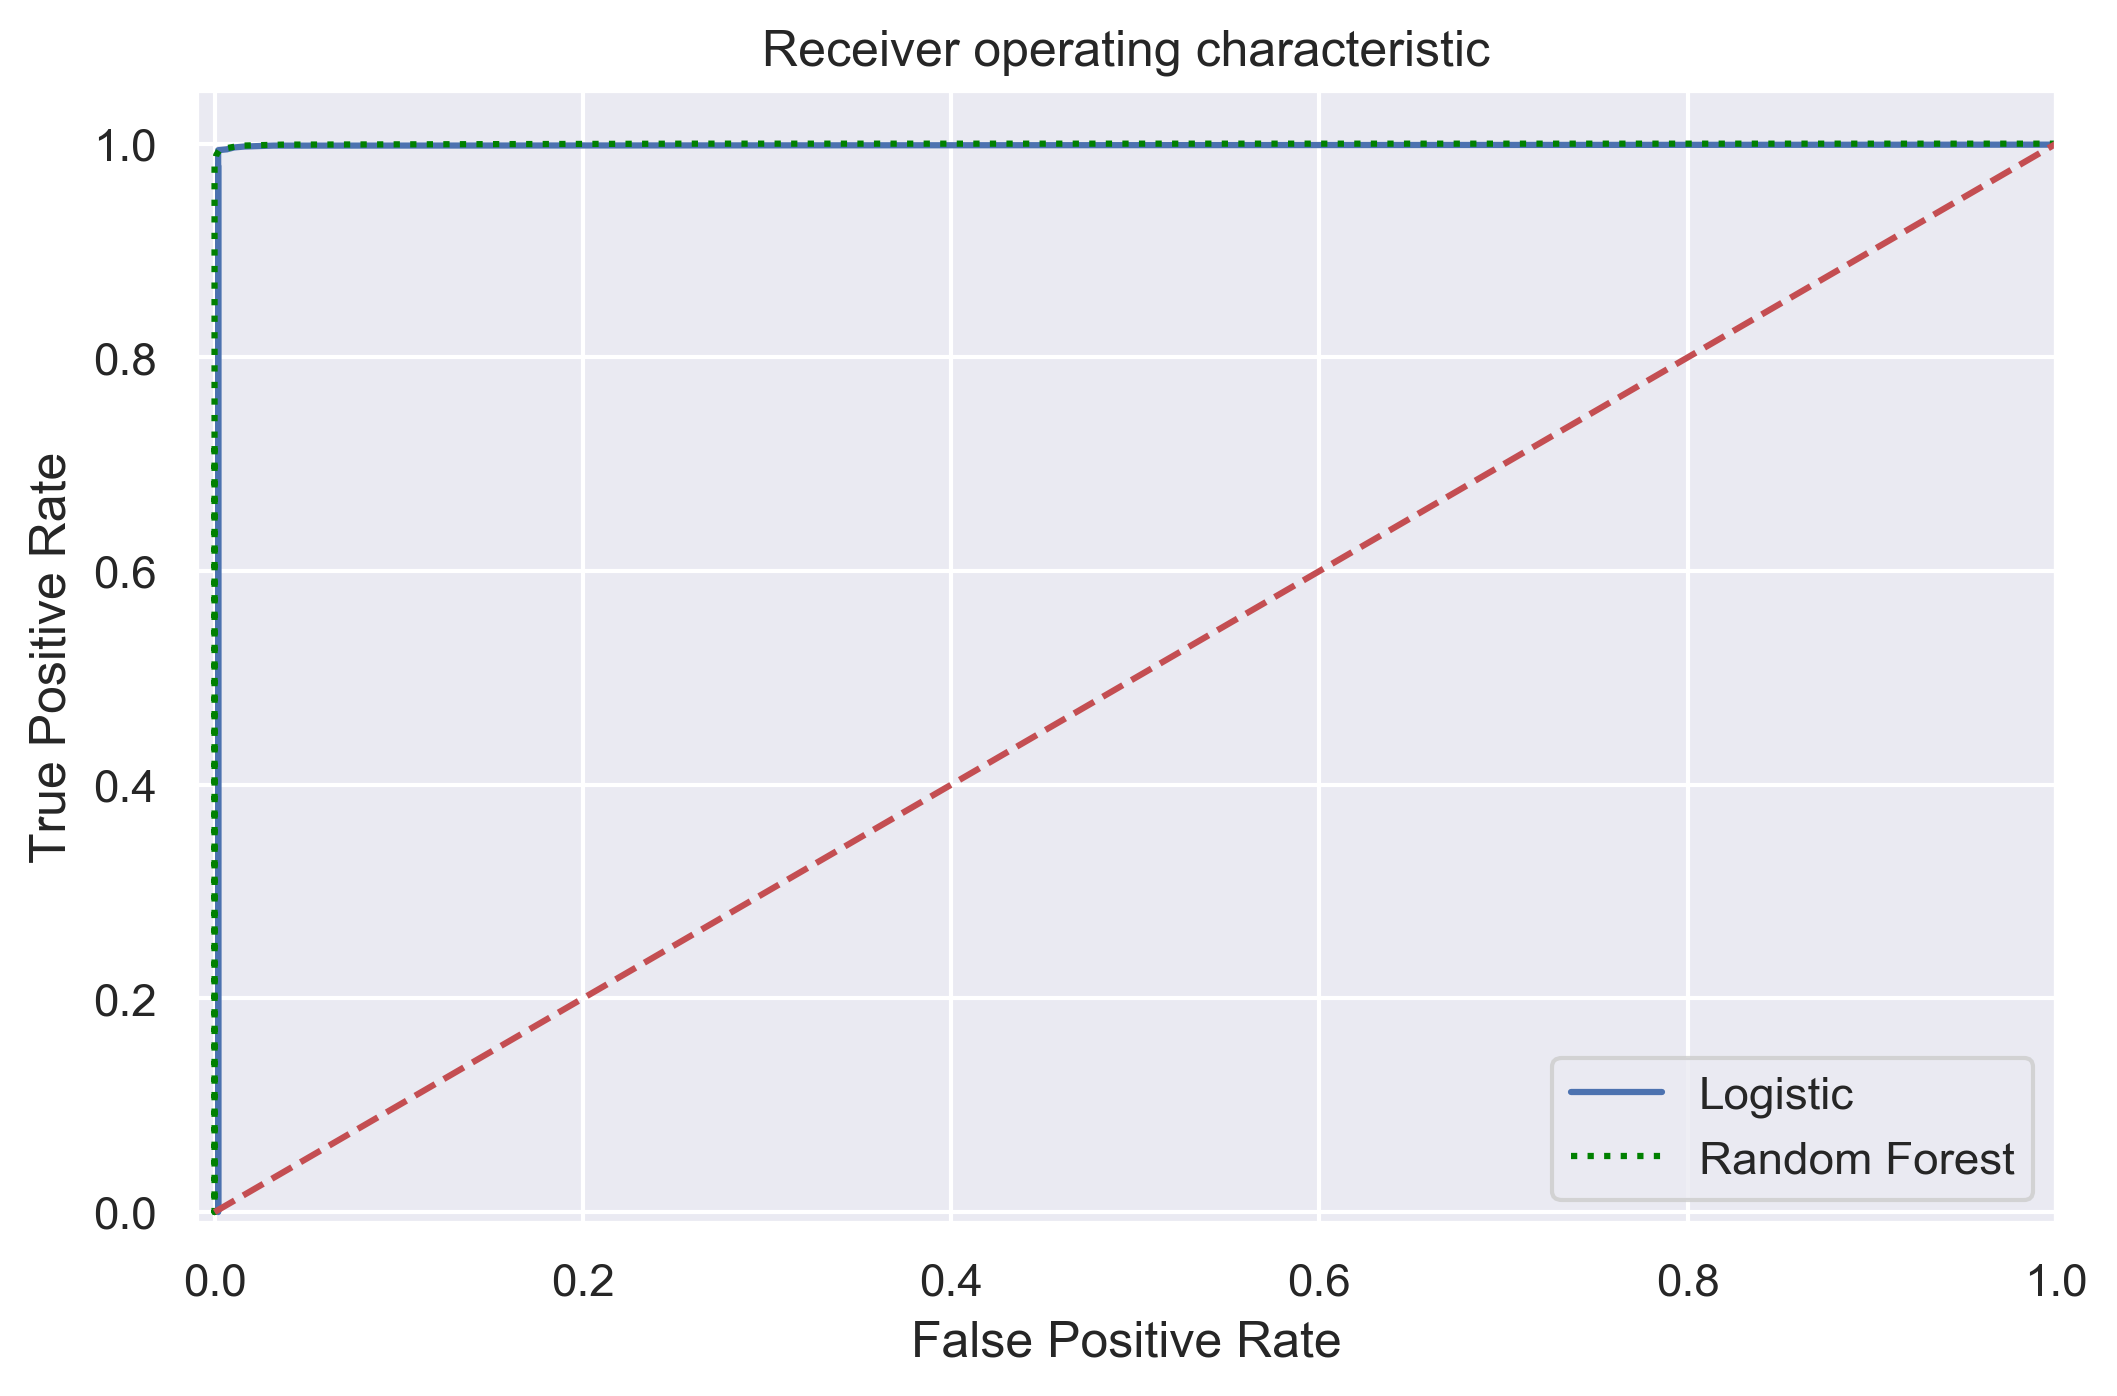

In [15]:
#Q.3
#Logistic ROC
xvalues = []
yvalues = [] 
Treshold=[0.000000001,0.00000001,0.000001,0.00001,0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
for i in Treshold:
    predict_probabilities = logreg.predict_proba(dfTest_X)[:,1]
    y_pred = np.where(predict_probabilities > i, 7, 1)
    xvalues.append((confMat(y_pred,dfTest_y)[0,1])/(confMat(y_pred,dfTest_y)[0,1]+confMat(y_pred,dfTest_y)[1,1]))
    yvalues.append((confMat(y_pred,dfTest_y)[0,0])/(confMat(y_pred,dfTest_y)[0,0]+confMat(y_pred,dfTest_y)[1,0]))
xvalues.insert(0,1)
yvalues.insert(16,0)
xvalues=np.array(xvalues)
yvalues = np.array(yvalues)

#Random forest
xvalues2 = []
yvalues2 = [] 
Treshold=[0.000000001,0.00000001,0.000001,0.00001,0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
for i in Treshold:
    y_pred2 = np.where(y_predRN[:,1] > i, 7, 1)
    xvalues2.append((confMat(y_pred2,dfTest_y)[0,1])/(confMat(y_pred2,dfTest_y)[0,1]+confMat(y_pred2,dfTest_y)[1,1]))
    yvalues2.append((confMat(y_pred2,dfTest_y)[0,0])/(confMat(y_pred2,dfTest_y)[0,0]+confMat(y_pred2,dfTest_y)[1,0]))
xvalues2.insert(0,1)
yvalues2.insert(16,0)
xvalues2=np.array(xvalues2)
yvalues2 = np.array(yvalues2)
plt.figure(figsize = (8,5),dpi=300)
plt.plot(xvalues, yvalues, label="Logistic")
plt.plot(xvalues2, yvalues2,':',color='green', label="Random Forest")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [16]:
preds=random_forest.predict(dfTest_X)

## Q 4

For one of your classifiers, display four examples that were classified incorrectly. Can you see what
made these examples hard for the classifier?

In [17]:
dfTest_y['preds'] = preds
misclassified = dfTest_y[dfTest_y.y != dfTest_y.preds]

correctly_classified = dfTest_y[dfTest_y.y == dfTest_y.preds]

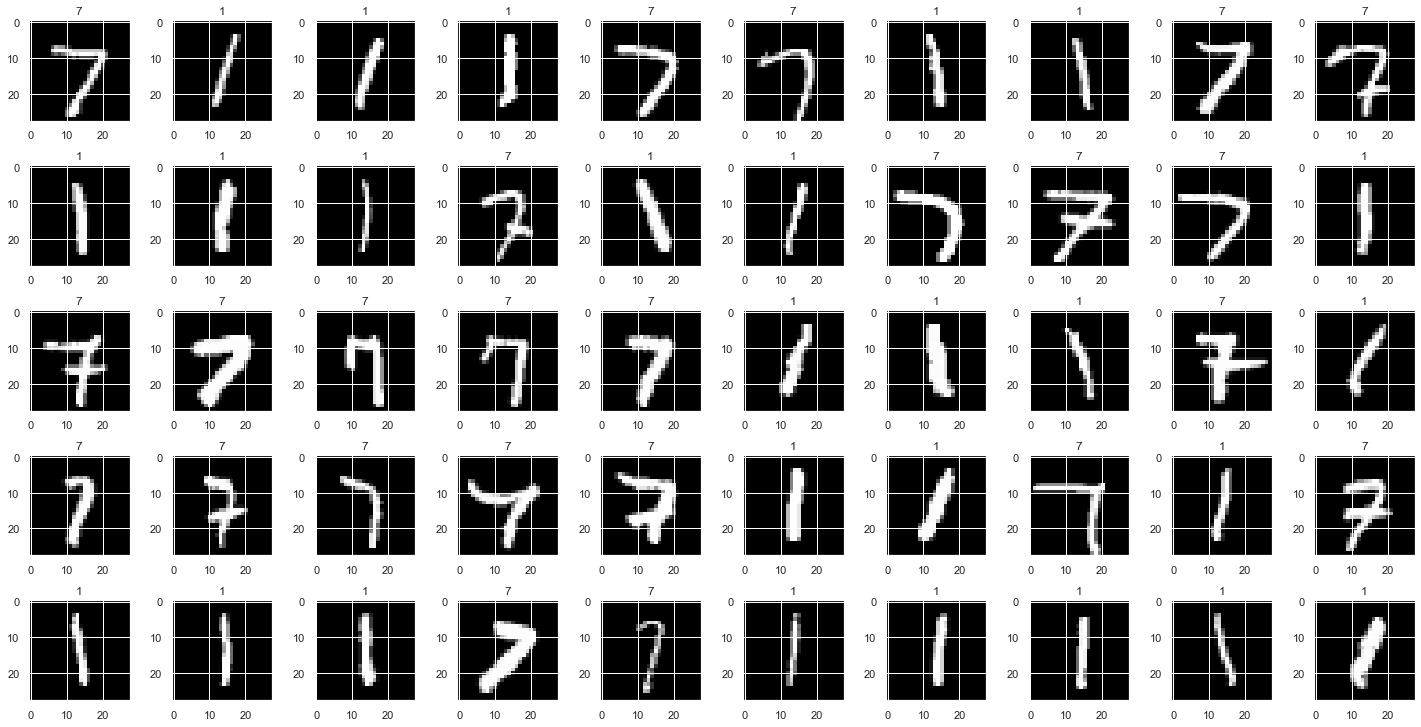

In [18]:
# Display Correctly Classified images
PlotSomeDigits(50,dfTest_X,dfTest_y,indexes=correctly_classified.index,Random = False)  

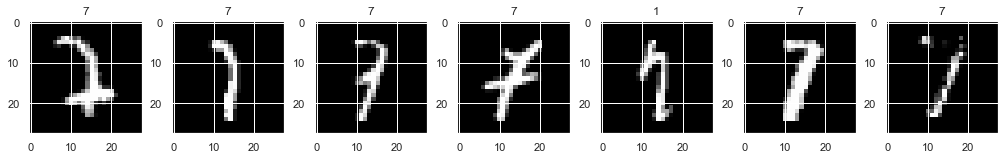

In [19]:
# Please note that we display here their true labels 

PlotSomeDigits(7,dfTest_X,dfTest_y,indexes=misclassified.index,Random = False)  

Answer -


We want to answer this question as emprically as possible. We know that 0 represent a black pixel, while 255 is white.
Therefore below we computed the percentage of black pixels out of total pixels in the picture. 
We assume that  for '1' digits the percentage of the black pixels will be higher.

In [20]:
def getRatio(dfTrain_X,dfTrain_y):
    output = []
    for i in range(0,len(dfTrain_X)):                
        vec = dfTrain_X.iloc[i].to_numpy()
        res = pd.DataFrame(pd.Series(vec).value_counts(),columns=['Freq'])
        ratio = res.loc[0].values[0]/np.sum(res.values)        
        output.append([dfTrain_y.iloc[i][0],ratio])
    output = pd.DataFrame(output,columns=['TrueLabel','BlackPercentage'])
    return output


def getPartsRatios(dfTrain_X,dfTrain_y):
    """Calculates the Percentage of black pixels on the right and left side of the picture."""
    output = []
    for i in range(0,len(dfTrain_X)):
        vec = dfTrain_X.iloc[i].to_numpy().reshape(28,28)
        rightSide = vec[0:28,0:10]
        leftSide = vec[0:28,18:28]
        leftSide = leftSide.reshape(-1,1)[:,0]
        rightSide = rightSide.reshape(-1,1)[:,0]
        res_right = pd.DataFrame(pd.Series(rightSide).value_counts(),columns=['Freq'])
        res_left = pd.DataFrame(pd.Series(leftSide).value_counts(),columns=['Freq'])
        ratio_right = res_right.loc[0].values[0]/np.sum(res_right.values)  
        ratio_left = res_left.loc[0].values[0]/np.sum(res_left.values)
        output.append([dfTrain_y.iloc[i][0],ratio_right,ratio_left])
    output = pd.DataFrame(output,columns=['TrueLabel','BlackPercentage_Right','BlackPercentage_Left'])
    return output



results = getPartsRatios(dfTest_X,dfTest_y)

results_misclassified = getPartsRatios(dfTest_X.loc[misclassified.index],dfTest_y.loc[misclassified.index])

ratios = getRatio(dfTest_X,dfTest_y)

ratios_misclassified = getRatio(dfTest_X.loc[misclassified.index],dfTest_y.loc[misclassified.index])

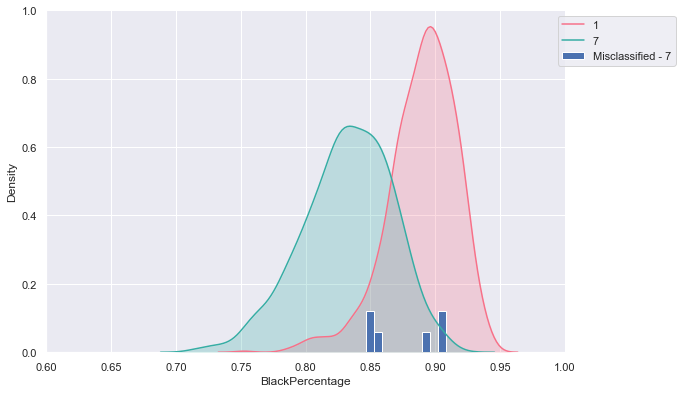

In [21]:
g= sns.pairplot(ratios, hue ="TrueLabel", palette='husl', markers='d')
g._legend.remove()
g = (g.set(xlim=(0.6,1),ylim=(0,1)))
# plt.figure(figsize=(8,6))
ratios_misclassified[ratios_misclassified.TrueLabel == 7].BlackPercentage.hist(label = 'Misclassified - 7',bins =10)
# ratios_misclassified[ratios_misclassified.TrueLabel == 1].BlackPercentage.hist(label = 'Misclassified - 1',bins =4)
g.fig.set_figwidth(14)
g.fig.set_figheight(6)
plt.legend(loc='upper center', bbox_to_anchor=(1.10, 1.0), ncol=1)
for ax, lbl in zip(g.axes.flatten(), 'abcd'):
    ax.set_ylabel('Density')

As we can see - there is a difference in the precentage of the black pixels between the '1' and '7' digits. In addition, the blue bins in the graph represent the missclassified digits.

Please note that these digits fall exactly at the mutual area between the distribution - therefore it can be a source of the missclassification

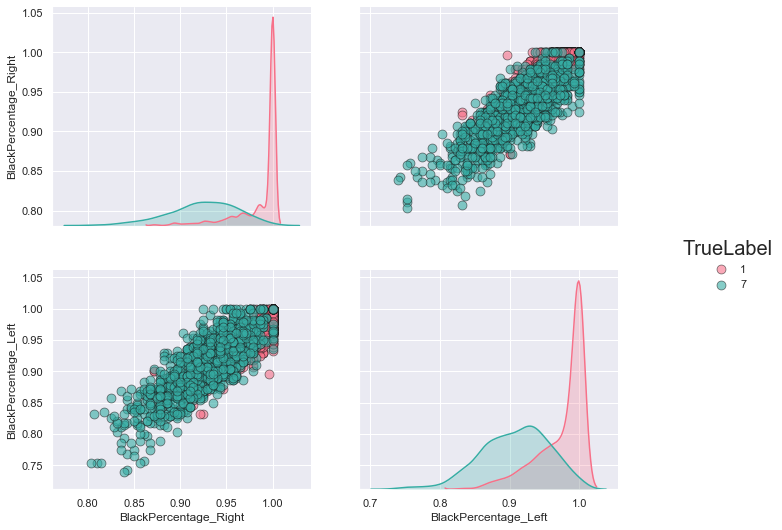

In [22]:
g= sns.pairplot(results, hue ="TrueLabel", palette='husl',
               plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 2)

g.fig.set_figwidth(12)
g.fig.set_figheight(8)
g._legend.get_title().set_fontsize(20)    
plt.show()

In addition to the total black pixel percentage, we wanted to address the position of the pixels in the picture. 

We assume that for '1' digits the percentage of the black pixels will be significantly higher for the left and right areas in the picture. 

As we can see from the plot, there is evidence to that. 

## Q 5 

Here is an image of a white digit (the digit 1) on a dark background. Do you expect both of your fitted
classifiers to work well on this image? Why or why not?

We understood from the question that R students had black digit on a white background and the question relates to that case (while we had white digit with black background 0 - back 255 - white). We will answer this question as if we were R users. 
We saw from the previous questions that there are more black pixels than white pixels in digit 7. we assume that in the case of the picture it will be classified as digit 7 and will be another case of misclassification for our trained classifiers.